In [1]:
import numpy as np
import pandas as pd
import os
import sys
import pickle
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from importlib import reload
%matplotlib inline
from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:80% !important; }</style>")) 

In [2]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 999

In [6]:
cwd = os.getcwd()
ratings = pd.read_csv(os.path.join(cwd, "..", "data", "ml-20m", "ratings.csv"))
ratings.drop('timestamp', axis=1, inplace=True)

In [7]:
ratings.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


# Sparsity

In [8]:
n_users = ratings['userId'].nunique()
n_movies = ratings['movieId'].nunique()

In [9]:
print('number of users: {}\nnumber of movies: {}'.format(n_users, n_movies))

number of users: 138493
number of movies: 26744


In [10]:
print('sparsity level is {}%'.format(round((1.0 - len(ratings)/float(n_users*n_movies))*100, 4)))

sparsity level is 99.46%


# Summarize by movie

In [11]:
movie_summary = pd.DataFrame(ratings.groupby('movieId')['rating'].mean())

In [12]:
movie_summary.head()

,rating
movieId,
1,3.921240
2,3.211977
3,3.151040
4,2.861393
5,3.064592


In [13]:
movie_summary['num_ratings'] = ratings.groupby('movieId')['rating'].count()

In [14]:
movie_summary.head()

,rating,num_ratings
movieId,,
1,3.921240,49695
2,3.211977,22243
3,3.151040,12735
4,2.861393,2756
5,3.064592,12161


## Rating frequency

In [15]:
movie_summary['num_ratings'].describe()

count    26744.000000
mean       747.841123
std       3085.818268
min          1.000000
25%          3.000000
50%         18.000000
75%        205.000000
max      67310.000000
Name: num_ratings, dtype: float64

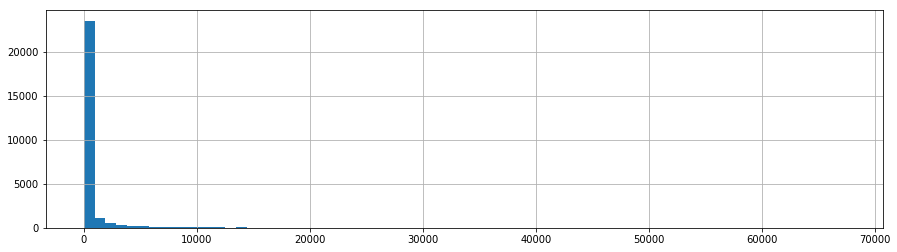

In [16]:
plt.figure(figsize=(15,4))
movie_summary['num_ratings'].hist(bins=70)

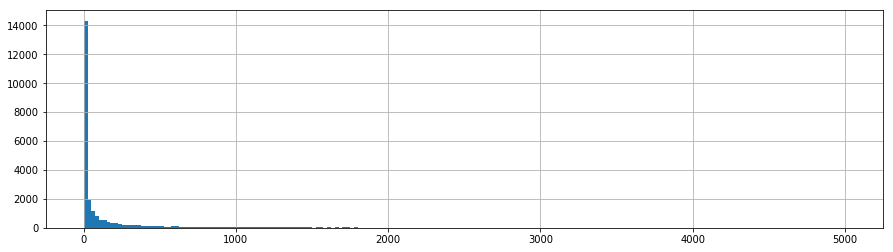

In [17]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 5000]['num_ratings'].hist(bins=200)

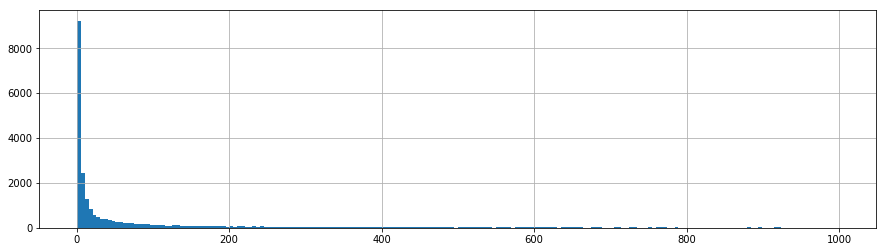

In [18]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 1000]['num_ratings'].hist(bins=200)

How many movies have less than 100 ratings?

In [19]:
(movie_summary['num_ratings'] < 100).sum()

18198

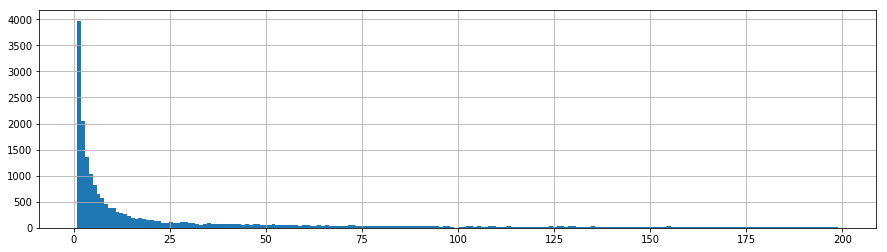

In [20]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 200]['num_ratings'].hist(bins=200)

In [22]:
# how many movies have only 1 rating, could drop all these
print('num movies with 1 rating  = {}'.format((movie_summary['num_ratings'] == 1).sum()))
print('num movies with 0 ratings = {}'.format((movie_summary['num_ratings'] == 0).sum()))

num movies with 1 rating  = 3972
num movies with 0 ratings = 0


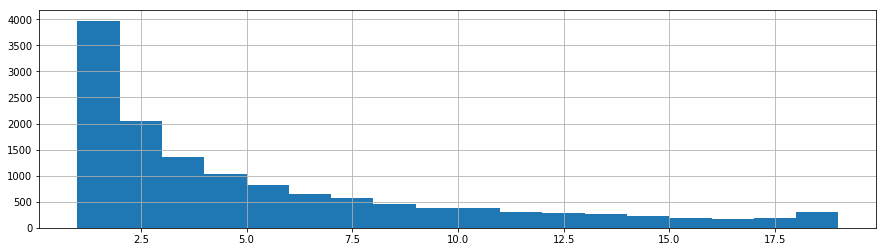

In [23]:
plt.figure(figsize=(15,4))
movie_summary[movie_summary['num_ratings'] < 20]['num_ratings'].hist(bins=18)

## Rating value

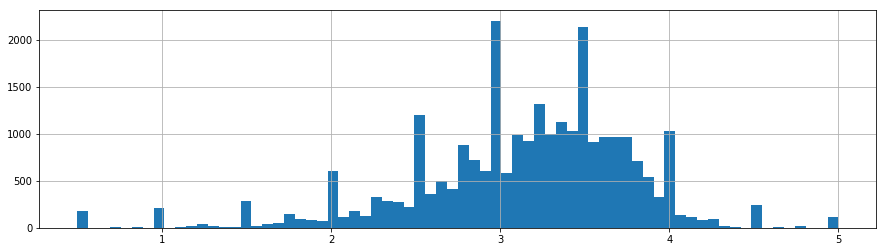

In [24]:
plt.figure(figsize=(15,4))
movie_summary['rating'].hist(bins=70)

## Interaction between ratings and rating frequency

/Users/alineberry/anaconda2/envs/my-movie-recommender/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alineberry/anaconda2/envs/my-movie-recommender/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


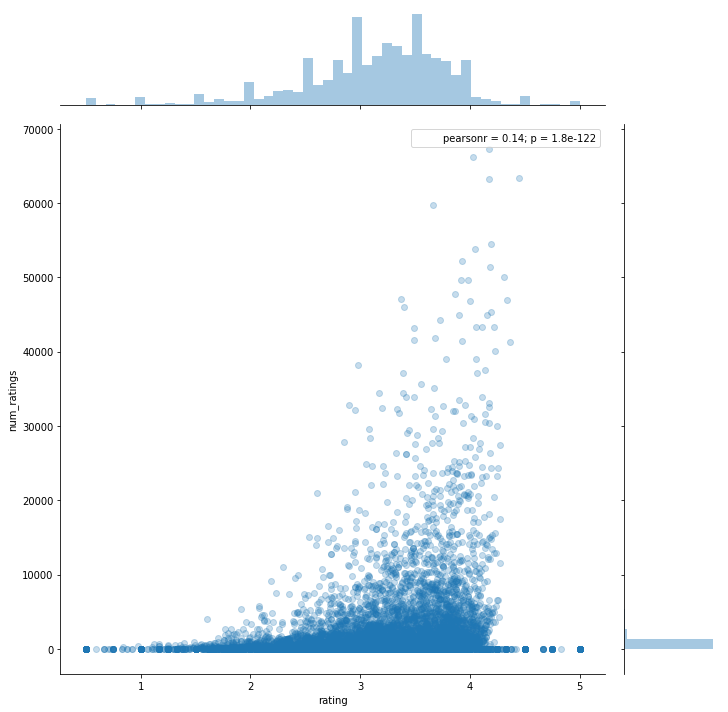

In [25]:
sns.jointplot(x='rating',y='num_ratings',data=movie_summary,alpha=0.25, size=10)

# Summarize by user

In [26]:
user_summary = pd.DataFrame(ratings.groupby('userId')['rating'].count())

In [27]:
user_summary.columns = ['rating_freq']

In [28]:
user_summary['rating_mean'] = ratings.groupby('userId')['rating'].mean()

In [29]:
user_summary.head()

,rating_freq,rating_mean
userId,,
1,175,3.742857
2,61,4.000000
3,187,4.122995
4,28,3.571429
5,66,4.272727


In [30]:
user_summary.describe()

,rating_freq,rating_mean
count,138493.000000,138493.000000
mean,144.413530,3.627209
std,230.267257,0.443030
min,20.000000,0.500000
25%,35.000000,3.369478
50%,68.000000,3.653846
75%,155.000000,3.923077
max,9254.000000,5.000000


## Rating frequency

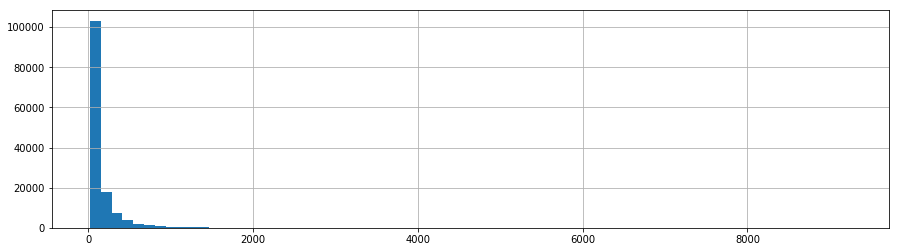

In [31]:
plt.figure(figsize=(15,4))
user_summary['rating_freq'].hist(bins=70)

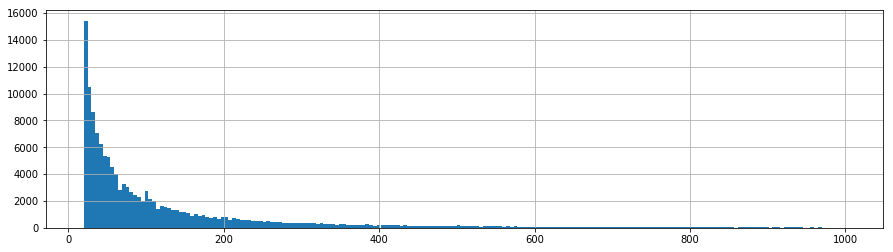

In [32]:
plt.figure(figsize=(15,4))
user_summary[user_summary['rating_freq'] < 1000]['rating_freq'].hist(bins=200)

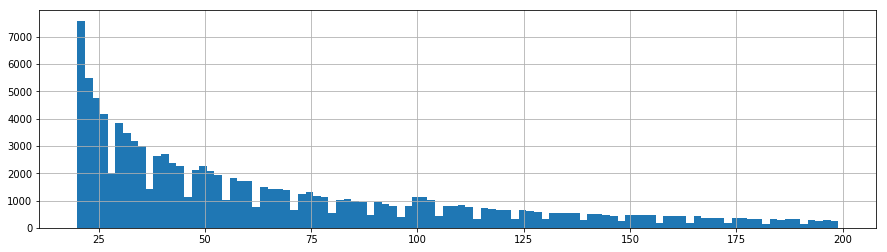

In [33]:
plt.figure(figsize=(15,4))
user_summary[user_summary['rating_freq'] < 200]['rating_freq'].hist(bins=100)

## Rating value

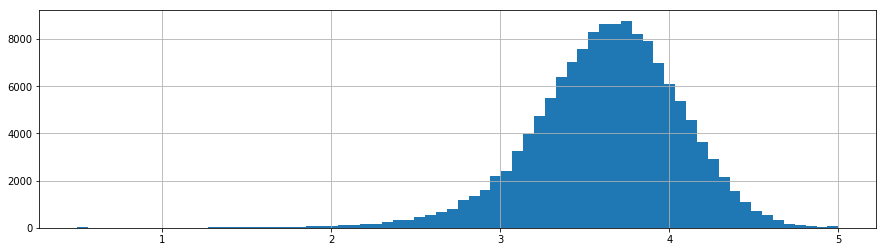

In [34]:
plt.figure(figsize=(15,4))
user_summary['rating_mean'].hist(bins=70)

## Interaction between ratings and rating frequency

/Users/alineberry/anaconda2/envs/my-movie-recommender/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/alineberry/anaconda2/envs/my-movie-recommender/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


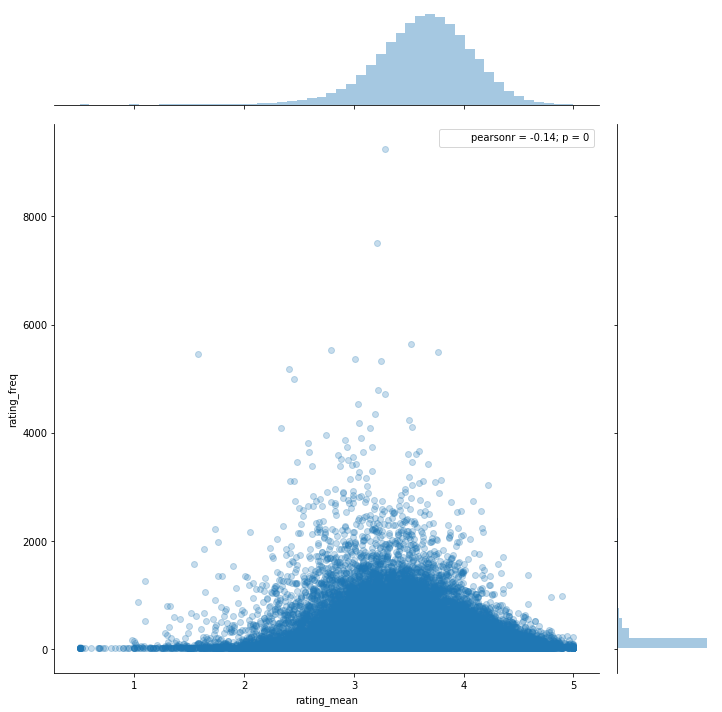

In [35]:
sns.jointplot(x='rating_mean',y='rating_freq',data=user_summary,alpha=0.25, size=10)